# Technical Assignment - IKEA DA

Prepared by **Michael Zhang** | 2021 Mar | @AMSTERDAM

## 0. Executive Summary

### Question 1: Propose a segmentation analysis

Seg A, B, C

### Question 3: Key segment(s) to focus to increase sales

Seg A
based on A, B, C reasons
* Increase sales is more of a short-term goal -> with the info I have, either focus on the large seg with potential to upsell (small improvement but big moneytory potential), or niche seg with great %growth potential

### Question 2: Potential data points to improve the analysis

* Unit info: understand if the product is of high unit price (which may not be purchased again in a short term)
* Category info: similar to above; also make it difficult to interpret the clustering
* Transactional info: what does it buy together per order -> basket analysis, frequency analysis, recency (3D of CLV or CV)


### Question 4: Prediction of the value in "HaveChildren" with vitualization

## 1. Data Import and Exploration

In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
# from sklearn-extras
# from sk-learn-extra

In [5]:
# df = pd.read_csv('RetailCustomerSales.csv',sep = ';', dtype = {'CustomerID':'category',
#                                                                'ItemID':'category',
#                                                                'Sex':'category',
#                                                                'Age':'category',
#                                                                'Profession':'category',
#                                                                'CityType':'category',
#                                                                'YearsInCity':'category',
#                                                                'HaveChildren':'category',
#                                                                'ItemCategory1':'category',
#                                                                'ItemCategory2':'category',
#                                                                'ItemCategory3':'category'})

df = pd.read_csv('RetailCustomerSales.csv',sep = ';', dtype = {'CustomerID':'str',
                                                               'ItemID':'str',
                                                               'Sex':'str',
                                                               'Age':'str',
                                                               'Profession':'str',
                                                               'CityType':'str',
                                                               'YearsInCity':'str',
                                                               'HaveChildren':'str',
                                                               'ItemCategory1':'str',
                                                               'ItemCategory2':'str',
                                                               'ItemCategory3':'str'})

In [6]:
display(df)

,CustomerID,ItemID,Sex,Age,Profession,CityType,YearsInCity,HaveChildren,ItemCategory1,ItemCategory2,ItemCategory3,Amount
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6,14,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,1,2,NaN,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,15,16,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,15,NaN,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,NaN,NaN,7172


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   CustomerID     537577 non-null  object
 1   ItemID         537577 non-null  object
 2   Sex            537577 non-null  object
 3   Age            537577 non-null  object
 4   Profession     537577 non-null  object
 5   CityType       537577 non-null  object
 6   YearsInCity    537577 non-null  object
 7   HaveChildren   517407 non-null  object
 8   ItemCategory1  537577 non-null  object
 9   ItemCategory2  370591 non-null  object
 10  ItemCategory3  164278 non-null  object
 11  Amount         537577 non-null  int64 
dtypes: int64(1), object(11)
memory usage: 49.2+ MB


In [8]:
# Check Null value
print(df.isnull().sum())

CustomerID            0
ItemID                0
Sex                   0
Age                   0
Profession            0
CityType              0
YearsInCity           0
HaveChildren      20170
ItemCategory1         0
ItemCategory2    166986
ItemCategory3    373299
Amount                0
dtype: int64


In [9]:
df.describe()

,Amount
count,537577.000000
mean,9333.859853
std,4981.022133
min,185.000000
25%,5866.000000
50%,8062.000000
75%,12073.000000
max,23961.000000


In [10]:
# len(df['CustomerID'].unique())
consumer_item = df.groupby('CustomerID')['ItemID'].nunique().sort_values()
print(consumer_item)

CustomerID
1000708       5
1005391       6
1004991       6
1005810       6
1002111       6
           ... 
1000889     822
1001181     861
1001941     898
1004277     978
1001680    1025
Name: ItemID, Length: 5891, dtype: int64


In [11]:
# len(df['CustomerID'].unique())
consumer_spend = df.groupby('CustomerID')['Amount'].sum().sort_values()
print(consumer_spend)

#plot: check outliers

CustomerID
1004991       44108
1005117       44432
1005012       45551
1005944       46070
1004464       46091
             ...   
1000424     6573609
1001941     6817493
1002909     7577505
1001680     8699232
1004277    10536783
Name: Amount, Length: 5891, dtype: int64


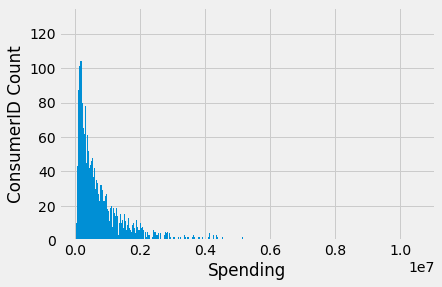

In [12]:
#plot: check potential outliers and distribution
plt.style.use("fivethirtyeight")
plt.hist(consumer_spend, bins = 1000)
plt.xlabel("Spending")
plt.ylabel("ConsumerID Count")
plt.show()

In [13]:
consumer_spend.describe()

count    5.891000e+03
mean     8.517515e+05
std      9.329978e+05
min      4.410800e+04
25%      2.349140e+05
50%      5.126120e+05
75%      1.099005e+06
max      1.053678e+07
Name: Amount, dtype: float64

**Based on above chart, turn spending per consumer into log scale skew to positive side (check the ref)**

In [14]:
# len(df['ItemID'].unique())
item_consumer = df.groupby('ItemID')['CustomerID'].nunique().sort_values()
print(item_consumer)

ItemID
P00056542       1
P00013442       1
P00013542       1
P00013842       1
P00206542       1
             ... 
P00057642    1430
P00112142    1539
P00025442    1586
P00110742    1591
P00265242    1858
Name: CustomerID, Length: 3623, dtype: int64


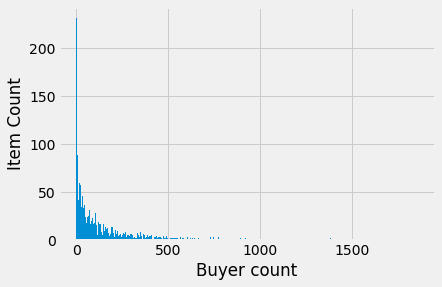

In [15]:
#plot popular product and check distribution
plt.style.use("fivethirtyeight")
plt.hist(item_consumer, bins = 1000)
plt.xlabel("Buyer count")
plt.ylabel("Item Count")
plt.show()

In [16]:
item_consumer.describe()

count    3623.000000
mean      148.378968
std       208.176730
min         1.000000
25%        19.000000
50%        70.000000
75%       192.000000
max      1858.000000
Name: CustomerID, dtype: float64

In [17]:
# len(df['ItemID'].unique())
item_sales = df.groupby('ItemID')['Amount'].sum().sort_values()
print(item_sales)

#plot high sales value

ItemID
P00091742         405
P00309042         726
P00353042        1545
P00325342        1656
P00012942        1717
               ...   
P00059442    23948299
P00184942    24060871
P00255842    24652442
P00110742    26382569
P00025442    27532426
Name: Amount, Length: 3623, dtype: int64


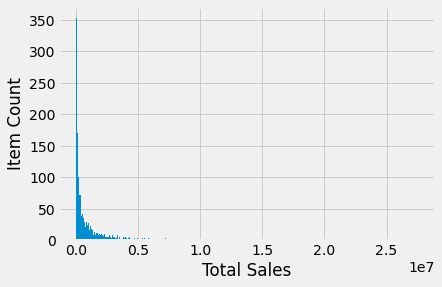

In [18]:
#plot high total sales value and check distribution
plt.style.use("fivethirtyeight")
plt.hist(item_sales, bins = 1000)
plt.xlabel("Total Sales")
plt.ylabel("Item Count")
plt.show()

In [19]:
item_sales.describe()

count    3.623000e+03
mean     1.384948e+06
std      2.608237e+06
min      4.050000e+02
25%      1.143055e+05
50%      4.352640e+05
75%      1.503716e+06
max      2.753243e+07
Name: Amount, dtype: float64

In [20]:
# df['Sex'].unique()
sex = df.groupby('Sex')['CustomerID'].nunique().sort_index()
print(sex)

Sex
F    1666
M    4225
Name: CustomerID, dtype: int64


In [21]:
# pd.Series(list(df['Age'].unique().astype('str'))).sort_values() # as category
# df['Sex'].unique()
age = df.groupby('Age')['CustomerID'].nunique().sort_index()
print(age)

Age
0-17      218
18-25    1069
26-35    2053
36-45    1167
46-50     531
51-55     481
55+       372
Name: CustomerID, dtype: int64


In [22]:
# df['CityType'].unique()
CityType = df.groupby('CityType')['CustomerID'].nunique().sort_index()
print(CityType)

CityType
A    1045
B    1707
C    3139
Name: CustomerID, dtype: int64


In [23]:
# df['YearsInCity'].unique() # as category
# YearsInCity = df['YearsInCity'].unique()
# print(np.sort(YearsInCity))
YearsInCity = df.groupby('YearsInCity')['CustomerID'].nunique().sort_index()
print(YearsInCity)

YearsInCity
0      772
1     2086
2     1145
3      979
4+     909
Name: CustomerID, dtype: int64


In [24]:
# pd.Series(list(df['Profession'].unique().astype('int'))).sort_values() # as category
# Profession = df['Profession'].nunique()
# print(np.sort(Profession))
Profession = df.groupby('Profession')['CustomerID'].nunique().sort_index()
print(Profession)

Profession
0     688
1     517
10    192
11    128
12    376
13    140
14    294
15    140
16    235
17    491
18     67
19     71
2     256
20    273
3     170
4     740
5     111
6     228
7     669
8      17
9      88
Name: CustomerID, dtype: int64


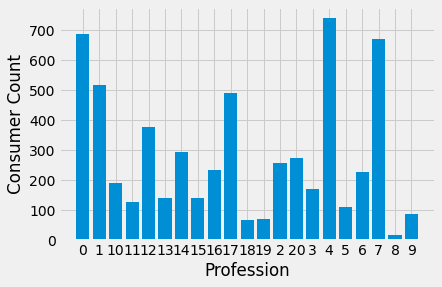

In [25]:
#plt to see if there is significant inbalanced value
plt.style.use("fivethirtyeight")
plt.bar(Profession.index,Profession)
plt.xlabel("Profession")
plt.ylabel("Consumer Count")
plt.show()

**Based on above chart, one-hot coding may skew heavily to the rare professions sucha as 8, 18, and 19. May consider use k-prototype/k-mode to avoid such issue**

In [26]:
# df['HaveChildren'].unique()
# df.loc[df['HaveChildren'].isnull(),'CustomerID'].nunique()
HaveChildren = df.groupby('HaveChildren',dropna=False)['CustomerID'].nunique().sort_index()
print(HaveChildren)

HaveChildren
0      3280
1      2399
NaN     212
Name: CustomerID, dtype: int64


**212 consumers are without Children info. Will need to run clustering twice - with and without NaN**

In [27]:
# df['ItemCategory1'].unique()
ItemCategory1 = df.groupby('ItemCategory1',dropna=False)['ItemID'].nunique().sort_values()
print(ItemCategory1)

ItemCategory1
9        2
17      11
12      25
10      25
18      30
13      35
14      44
15      44
4       88
3       90
16      98
7      102
6      119
2      152
11     254
1      491
5      966
8     1047
Name: ItemID, dtype: int64


In [28]:
# df['ItemCategory2'].unique()
ItemCategory2 = df.groupby('ItemCategory2',dropna=False)['ItemID'].nunique().sort_values()
print(ItemCategory2)

ItemCategory2
7         4
3        12
10       14
18       18
9        20
12       45
13       51
6        60
11       70
17       76
2       127
5       128
15      138
4       146
16      221
14      317
8       353
NaN    1823
Name: ItemID, dtype: int64


In [29]:
# df['ItemCategory3'].unique()
ItemCategory3 = df.groupby('ItemCategory3',dropna=False)['ItemID'].nunique().sort_values()
print(ItemCategory3)

ItemCategory3
3         3
10        5
11        6
18       14
4        14
6        14
13       16
12       31
8        37
9        37
17       42
5        43
15       69
14       80
16      115
NaN    3097
Name: ItemID, dtype: int64


In [30]:
df.loc[df['ItemCategory1'] == df['ItemCategory2'],'ItemID'].unique()

array([], dtype=object)

In [31]:
ItemCombo = df.groupby(['ItemCategory1','ItemCategory2','ItemCategory3'],
                       dropna=False)['ItemID'].nunique().sort_values()
print(ItemCombo)

ItemCategory1  ItemCategory2  ItemCategory3
9              NaN            NaN                1
5              8              12                 1
               6              9                  1
1              8              9                  1
                              18                 1
                                              ... 
5              14             NaN              136
               8              NaN              150
11             NaN            NaN              171
5              NaN            NaN              488
8              NaN            NaN              727
Name: ItemID, Length: 235, dtype: int64


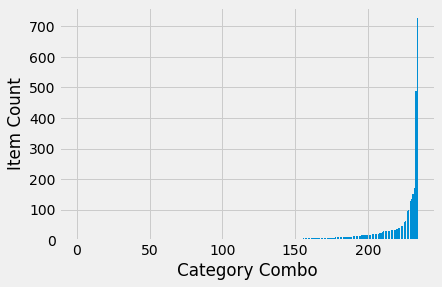

In [32]:
#plt to see how inbalanced it will be if converted to one hot encoded
ItemCombo_reindex = ItemCombo.reset_index()
plt.style.use("fivethirtyeight")
plt.bar(ItemCombo_reindex.index,ItemCombo_reindex.ItemID)
plt.xlabel("Category Combo")
plt.ylabel("Item Count")
plt.show()

In [33]:
ItemComboSales = df.groupby(['ItemCategory1','ItemCategory2','ItemCategory3'],
                       dropna=False)['Amount'].sum().sort_values()
print(ItemComboSales)

ItemCategory1  ItemCategory2  ItemCategory3
5              10             16                    7218
9              NaN            NaN                  18456
10             11             NaN                  19206
4              9              NaN                  29149
8              14             18                  117448
                                                 ...    
5              8              NaN              149089678
1              2              15               191990411
               16             NaN              198147606
5              NaN            NaN              383126455
8              NaN            NaN              449437193
Name: Amount, Length: 235, dtype: int64


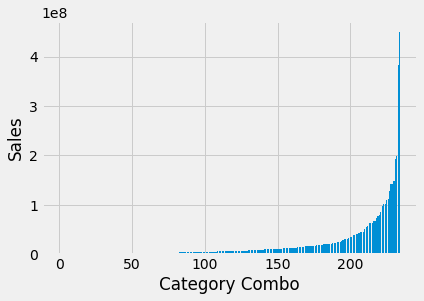

In [34]:
#plt to see how inbalanced it will be if converted to one hot encoded
ItemComboSales_reindex = ItemComboSales.sort_values().reset_index()
# ItemComboSales_reindex['CatCombo'] = ItemComboSales_reindex.index
plt.style.use("fivethirtyeight")
plt.bar(ItemComboSales_reindex.index,ItemComboSales_reindex.Amount)
plt.xlabel("Category Combo")
plt.ylabel("Sales")
plt.show()

In [35]:
print(ItemComboSales_reindex.head())

  ItemCategory1 ItemCategory2 ItemCategory3  Amount
0             5            10            16    7218
1             9           NaN           NaN   18456
2            10            11           NaN   19206
3             4             9           NaN   29149
4             8            14            18  117448


**Either convert to 18 categories with overlaps (double count if one item falls to more than one category or use the 235 category combinations; run them with and without such. With 235 combo, also need to be logged**

## 2. Segmentation

Some options I have/decisions I have to make/Reasoning:
1. If there is an outlier -> looks like the data is quite clean
2. To standardize or not (for cat amount and the total amount)  
using mapping and replace  
CustomerID -> group by  
ItemID -> drop  
Sex -> to -1 and 1; group by  
Age -> take the medium and rescale (0-17 as 16; 55+ as 60)/ rescale  
Profession -> one-hot encoding?  
CityType -> 1/A, 0/B, -1/C? 
YearsInCity -> convert to numbers (4+ as 4); group by  
(hold on) HaveChildren -> to -1(N), 0 (NULL) and 1(Y); group by   
235 cateogires -> both take log and rescale  
Amount -> tke the log and rescale  
3. 18 main cat (with amount overlap and also corelation between cats) or 200+ combo cat
4. can I use k-means++ to set the centroid
5. k-means, k-prototype, k-mode/medroid
6. what evaluation metrics to use: EC, explanationary, SW

### 2.1 Data Preparation

In [36]:
## Group by the demographic features
df_gb = df.copy()
df_gb = df_gb.groupby(['CustomerID','Sex','Age','Profession',\
                      'CityType','YearsInCity','HaveChildren'],dropna=False)['Amount']\
                      .sum().reset_index().set_index('CustomerID')
df_gb = df_gb.rename(columns={'Amount':'TotalSpending'})

In [37]:
## Create mapping for sex, age, CityType, YearsInCity
replace_map = {'Sex': {'M': 1, 'F': 0},
               'Age': {'0-17': 16, '18-25': 21.5, '26-35': 30.5, '36-45': 40.5,
                       '46-50': 48, '51-55': 53, '55+': 55},
               'CityType': {'A': 1, 'B': 2, 'C': 3},
               'YearsInCity': {'0': 0, '1': 1, '2': 2, '3':3, '4+':4},
               'HaveChildren': {'0': -0.5, '1': 0.5}}

In [38]:
## Replace the value with the mapping
df_demo = df_gb.copy()
df_demo.replace(replace_map, inplace=True)
df_demo.drop(columns='Profession', inplace=True)

print(df_demo.head())

            Sex   Age  CityType  YearsInCity  HaveChildren  TotalSpending
CustomerID                                                               
1000001       0  16.0         1            2          -0.5         333481
1000002       1  55.0         3            4          -0.5         810353
1000003       1  30.5         1            3          -0.5         341635
1000004       1  48.0         2            2           0.5         205987
1000005       1  30.5         1            1           0.5         821001


In [39]:
df_demo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5891 entries, 1000001 to 1006040
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sex            5891 non-null   int64  
 1   Age            5891 non-null   float64
 2   CityType       5891 non-null   int64  
 3   YearsInCity    5891 non-null   int64  
 4   HaveChildren   5679 non-null   float64
 5   TotalSpending  5891 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 322.2+ KB


In [40]:
## Create one-hot encoding for professions

df_prof = df_gb.copy().reset_index().set_index('CustomerID')
df_prof.drop(columns=['Sex','Age','CityType','YearsInCity','HaveChildren','TotalSpending'], inplace=True)
df_prof = pd.get_dummies(df_prof, columns=['Profession'], prefix = ['Prof'])

print(df_prof.head())

            Prof_0  Prof_1  Prof_10  Prof_11  Prof_12  Prof_13  Prof_14  \
CustomerID                                                                
1000001          0       0        1        0        0        0        0   
1000002          0       0        0        0        0        0        0   
1000003          0       0        0        0        0        0        0   
1000004          0       0        0        0        0        0        0   
1000005          0       0        0        0        0        0        0   

            Prof_15  Prof_16  Prof_17  ...  Prof_19  Prof_2  Prof_20  Prof_3  \
CustomerID                             ...                                     
1000001           0        0        0  ...        0       0        0       0   
1000002           0        1        0  ...        0       0        0       0   
1000003           1        0        0  ...        0       0        0       0   
1000004           0        0        0  ...        0       0        0      

In [41]:
## Create one-hot encoding for cat combo
# df_cat = df.groupby(['CustomerID','ItemCategory1',
#                      'ItemCategory2','ItemCategory3'])['Amount'].sum()

df_combo = df.copy()

# df_combo['CatCombo'] = df_combo[['ItemCategory1','ItemCategory2','ItemCategory3']]\
#                        .agg('_'.join, axis=1)

df_combo['ItemCategory2'].fillna('N', inplace=True)
df_combo['ItemCategory3'].fillna('N', inplace=True)

df_combo['CatCombo'] = df_combo['ItemCategory1']+'_'\
                       +df_combo['ItemCategory2']+'_'\
                       +df_combo['ItemCategory3']

print(df_combo.sort_values(['CatCombo']).head())

       CustomerID     ItemID Sex    Age Profession CityType YearsInCity  \
137562    1003292  P00308042   F  51-55          6        B           3   
409858    1003110  P00346542   M  26-35          0        B           3   
3908      1000645  P00116142   M  36-45         20        A           2   
220120    1003934  P00161842   M  26-35          0        B           2   
130594    1002049  P00116142   F  51-55          0        A           1   

       HaveChildren ItemCategory1 ItemCategory2 ItemCategory3  Amount  \
137562            0            10            11             N   19206   
409858            1            10            13            16    4932   
3908            NaN            10            13            16   23395   
220120            0            10            13            16    4627   
130594            1            10            13            16   14258   

        CatCombo  
137562   10_11_N  
409858  10_13_16  
3908    10_13_16  
220120  10_13_16  
130594  10_13_1

In [42]:
df_combo = pd.pivot_table(df_combo, values=['Amount'], index=['CustomerID'],\
                          columns=['CatCombo'], aggfunc=np.sum, fill_value=0)\
                          .reset_index().set_index('CustomerID').droplevel(0, axis=1)

df_combo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5891 entries, 1000001 to 1006040
Columns: 235 entries, 10_11_N to 9_N_N
dtypes: int64(235)
memory usage: 10.6+ MB


In [43]:
print(df_combo.head())

CatCombo    10_11_N  10_13_16  10_13_N  10_14_16  10_15_16  10_15_N  10_16_N  \
CustomerID                                                                     
1000001           0         0        0         0         0        0        0   
1000002           0         0        0         0         0        0        0   
1000003           0         0        0         0         0        0        0   
1000004           0         0        0         0         0        0        0   
1000005           0         0        0         0         0        0        0   

CatCombo    10_N_N  11_13_16  11_13_N  ...  8_15_N  8_16_17  8_16_N  8_17_N  \
CustomerID                             ...                                    
1000001          0         0        0  ...       0        0       0    9938   
1000002          0         0        0  ...   16001        0   17865    6187   
1000003          0         0        0  ...       0        0    5817       0   
1000004          0         0        0  ...  

In [44]:
## Complie all the features together
df_compile = df_demo.join([df_prof, df_combo])

In [45]:
print(df_compile.head(20))

            Sex   Age  CityType  YearsInCity  HaveChildren  TotalSpending  \
CustomerID                                                                  
1000001       0  16.0         1            2          -0.5         333481   
1000002       1  55.0         3            4          -0.5         810353   
1000003       1  30.5         1            3          -0.5         341635   
1000004       1  48.0         2            2           0.5         205987   
1000005       1  30.5         1            1           0.5         821001   
1000006       0  53.0         1            1          -0.5         379450   
1000007       1  40.5         2            1           0.5         234427   
1000008       1  30.5         3            4           0.5         796545   
1000009       1  30.5         3            0          -0.5         593960   
1000010       0  40.5         2            4           0.5        2169486   
1000011       0  30.5         3            1          -0.5         556902   

In [46]:
df_compile.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5891 entries, 1000001 to 1006040
Columns: 262 entries, Sex to 9_N_N
dtypes: float64(2), int64(239), uint8(21)
memory usage: 11.1+ MB


##### Transform TotalSpending and all 

In [57]:
# featSet1 = df_compile[['Sex','Age','CityType','YearsInCity','HaveChildren',\
#                       'Prof_0','Prof_1','Prof_2','Prof_3','Prof_4','Prof_5',\
#                       'Prof_6','Prof_7','Prof_8','Prof_9','Prof_10','Prof_11',\
#                       'Prof_12','Prof_13','Prof_14','Prof_15','Prof_16','Prof_17',\
#                       'Prof_18','Prof_19','Prof_20']]

# featSet2 = df_compile['TotalSpending']

# featSet3 = df_compile.iloc[:,27:]

In [50]:
# featSet1

,Sex,Age,CityType,YearsInCity,HaveChildren,Prof_0,Prof_1,Prof_2,Prof_3,Prof_4,...,Prof_11,Prof_12,Prof_13,Prof_14,Prof_15,Prof_16,Prof_17,Prof_18,Prof_19,Prof_20
CustomerID,,,,,,,,,,,,,,,,,,,,,
1000001,0,16.0,1,2,-0.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000002,1,55.0,3,4,-0.5,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1000003,1,30.5,1,3,-0.5,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1000004,1,48.0,2,2,0.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000005,1,30.5,1,1,0.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1006036,0,30.5,2,4,NaN,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1006037,0,48.0,3,4,-0.5,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1006038,0,55.0,3,2,-0.5,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
# featSet2

CustomerID
1000001     333481
1000002     810353
1000003     341635
1000004     205987
1000005     821001
            ...   
1006036    3821666
1006037    1075037
1006038      80859
1006039     554504
1006040    1562615
Name: TotalSpending, Length: 5891, dtype: int64

In [52]:
# featSet3

,10_11_N,10_13_16,10_13_N,10_14_16,10_15_16,10_15_N,10_16_N,10_N_N,11_13_16,11_13_N,...,8_15_N,8_16_17,8_16_N,8_17_N,8_18_N,8_9_14,8_9_N,8_N_N,9_15_N,9_N_N
CustomerID,,,,,,,,,,,,,,,,,,,,,
1000001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,9938,0,0,0,59604,0,0
1000002,0,0,0,0,0,0,0,0,0,0,...,16001,0,17865,6187,0,0,0,152360,0,0
1000003,0,0,0,0,0,0,0,0,0,0,...,0,0,5817,0,0,0,0,0,0,0
1000004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000005,0,0,0,0,0,0,0,0,4653,0,...,7803,0,20245,7850,0,0,0,174152,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1006036,0,0,19066,23525,23254,0,37809,0,0,0,...,5976,0,53666,51636,0,0,0,650537,0,0
1006037,0,14248,0,14407,0,0,23714,0,0,0,...,15810,0,31320,27794,0,7809,0,220125,0,0
1006038,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,6039,0,0


In [59]:
# featSet2T = np.log(featSet2.to_numpy())
# featSet2T

array([12.71734117, 13.60522523, 12.74149819, ..., 11.30046218,
       13.2258293 , 14.26187126])

In [60]:
# featSet3T = np.log(featSet3.to_numpy())
# featSet3T

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


array([[       -inf,        -inf,        -inf, ..., 10.99547796,
               -inf,        -inf],
       [       -inf,        -inf,        -inf, ..., 11.93400142,
               -inf,        -inf],
       [       -inf,        -inf,        -inf, ...,        -inf,
               -inf,        -inf],
       ...,
       [       -inf,        -inf,        -inf, ...,  8.70599371,
               -inf,        -inf],
       [       -inf,  9.83793518, 10.07436892, ..., 10.22266829,
               -inf,        -inf],
       [       -inf, 10.05410342,        -inf, ..., 12.53267851,
         9.52653701,        -inf]])

In [68]:
## With HaveChildren set
df_full = df_compile.fillna(0)

In [69]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5891 entries, 1000001 to 1006040
Columns: 262 entries, Sex to 9_N_N
dtypes: float64(2), int64(239), uint8(21)
memory usage: 11.1+ MB


In [70]:
## Without HaveChildren set
df_dropna = df_compile.dropna(subset=['HaveChildren'])

In [71]:
df_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5679 entries, 1000001 to 1006040
Columns: 262 entries, Sex to 9_N_N
dtypes: float64(2), int64(239), uint8(21)
memory usage: 10.6+ MB


### 2.2 Clustering with all data

In [49]:
## K-means
## Ref: https://stats.stackexchange.com/questions/133656/how-to-understand-the-drawbacks-of-k-means
## Ref: https://realpython.com/k-means-clustering-python/

## PAM (Partitioning Around Medoids)
## Ref: https://towardsdatascience.com/clustering-datasets-having-both-numerical-and-categorical-variables-ed91cdca0677

## Categorical data
## Ref: https://www.datacamp.com/community/tutorials/categorical-data
## Ref: https://pbpython.com/categorical-encoding.html  
## Ref: https://towardsdatascience.com/all-about-categorical-variable-encoding-305f3361fd02
## Ref: https://stats.stackexchange.com/questions/393331/is-one-hot-encoding-and-standardization-of-data-equivalent-to-gowers-distance
## Ref: https://machinelearningmastery.com/how-to-one-hot-encode-sequence-data-in-python/#:~:text=A%20one%20hot%20encoding%20is,is%20marked%20with%20a%201.
## Ref: https://datascience.stackexchange.com/questions/22/k-means-clustering-for-mixed-numeric-and-categorical-data


##### Convert dataframe to array

In [72]:
features_full = df_full.to_numpy()
features_full

array([[0.00000e+00, 1.60000e+01, 1.00000e+00, ..., 5.96040e+04,
        0.00000e+00, 0.00000e+00],
       [1.00000e+00, 5.50000e+01, 3.00000e+00, ..., 1.52360e+05,
        0.00000e+00, 0.00000e+00],
       [1.00000e+00, 3.05000e+01, 1.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       ...,
       [0.00000e+00, 5.50000e+01, 3.00000e+00, ..., 6.03900e+03,
        0.00000e+00, 0.00000e+00],
       [0.00000e+00, 4.80000e+01, 2.00000e+00, ..., 2.75200e+04,
        0.00000e+00, 0.00000e+00],
       [1.00000e+00, 3.05000e+01, 2.00000e+00, ..., 2.77251e+05,
        1.37190e+04, 0.00000e+00]])

In [73]:
true_labels_full = df_full.index.to_numpy()
true_labels_full

array(['1000001', '1000002', '1000003', ..., '1006038', '1006039',
       '1006040'], dtype=object)

##### Scale the features

In [74]:
scaler = MinMaxScaler()
scaled_features_full = scaler.fit_transform(features_full)
scaled_features_full

array([[0.        , 0.        , 0.        , ..., 0.03848774, 0.        ,
        0.        ],
       [1.        , 1.        , 1.        , ..., 0.09838253, 0.        ,
        0.        ],
       [1.        , 0.37179487, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 1.        , 1.        , ..., 0.00389953, 0.        ,
        0.        ],
       [0.        , 0.82051282, 0.5       , ..., 0.01777033, 0.        ,
        0.        ],
       [1.        , 0.37179487, 0.5       , ..., 0.17902766, 0.58301815,
        0.        ]])

##### Set the parameter of K-means clustering

In [75]:
kmeans = KMeans(
    init="k-means++",
    n_clusters=4,
    n_init=50,
    max_iter=500,
    random_state=42
)

In [76]:
kmeans.fit(scaled_features_full)

KMeans(max_iter=500, n_clusters=4, n_init=50, random_state=42)

##### Result & Evaluation

In [77]:
# The lowest SSE value
kmeans.inertia_

28362.522715687923

In [78]:
# Final locations of the centroid
kmeans.cluster_centers_

array([[8.14506540e-01, 4.48138663e-01, 3.75148633e-01, ...,
        1.50714826e-01, 1.65429963e-01, 1.18906064e-03],
       [1.00000000e+00, 4.11389680e-01, 7.27654321e-01, ...,
        2.92227348e-02, 2.99908028e-02, 4.14707331e-18],
       [4.21884749e-15, 5.06622517e-01, 7.06953642e-01, ...,
        3.61417481e-02, 1.46454121e-02, 3.74049750e-18],
       [1.00000000e+00, 6.17982567e-01, 7.49834983e-01, ...,
        3.28126642e-02, 2.90545735e-02, 3.74049750e-18]])

In [79]:
# The number of iterations required to converge
kmeans.n_iter_

14

In [80]:
kmeans.labels_[:5]

array([2, 1, 1, 3, 3], dtype=int32)

##### SSE

In [82]:
kmeans_kwargs = {
    "init": "k-means++",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features_full)
    sse.append(kmeans.inertia_)

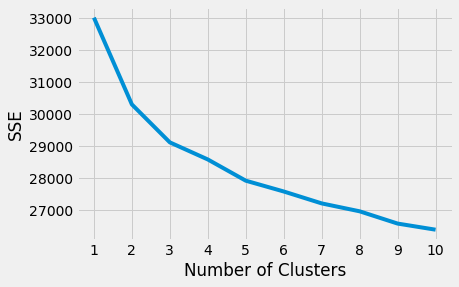

In [83]:
## Determine the elbow from plot
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [84]:
## Determine the elbow programmatically
kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)

kl.elbow

3

#### Evaluation - silhouette coefficients

In [85]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features_full)
    score = silhouette_score(scaled_features_full, kmeans.labels_)
    silhouette_coefficients.append(score)

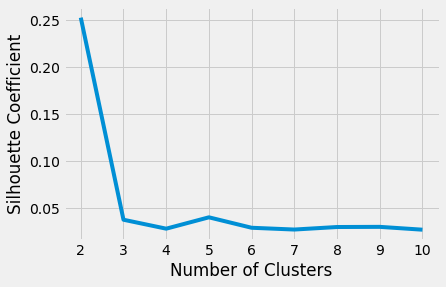

In [86]:
## Determine the max(sc) from plot
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

##### Visualize the results

In [88]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(8, 8))

scat = sns.scatterplot(
    "component_1",
    "component_2",
    s=50,
    data=pcadf,
    hue="predicted_cluster",
    style="true_label",
    palette="Set2",
)

scat.set_title(
    "Clustering results from TCGA Pan-Cancer\nGene Expression Data"
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

plt.show()

NameError: name 'pcadf' is not defined

<Figure size 576x576 with 0 Axes>